# メトロポリス法を用いたイジング模型シミュレーション

## ＜イジング模型とは何か＞
　イジング模型とは磁性体のモデルである。

　二つの状態（±1）を持ったスピンは隣り合ったスピンと相互に影響しあう。このスピンのエネルギーは式(1)で表せる。
 
　Sはスピン、Jは相互作用の強さを表す定数、Hは磁場である。

$$E = \displaystyle -J \sum_{ i,j (i \neq j)} S_i S_j - H \sum_{i} S_i\qquad(1)$$

## ＜メトロポリス法とは何か＞

　ある状態から変化させたとき、新しい状態と古い状態のエネルギー差をdEとする。
 
　　・dE < 0 のとき、新しい状態を採用する
  
　　・dE > 0 のとき、式(2）より確率Pで新しい状態を採用する
   
$$\large{ P = e^\frac{-dE}{KB \ T} \qquad (2) }$$

　Tは温度、KBはボルツマン定数である。


## ＜シミュレーテッドアニーリング＞

　シミュレーテッドアニーリングを用いる。説明は巡回セールスマン問題のページで書く。

## ＜コード＞

温度(T)、磁場(H)、試行回数(val,times)を変更すると結果が変わる

In [1]:
%matplotlib inline
import numpy as np
import math, random
import copy
import matplotlib.pyplot as plt

In [11]:
class ising:
    def __init__(self):
        self.J = 1.0
        self.H = 0.0
        self.T = 5.0
        self.val = 100
        self.times = 3
        self.spin = [[0 for i in range(self.val)] for j in range(self.val)]
        
    def init(self):
        for x in range(self.val):
            for y in range(self.val):
                if(random.randint(0, 1) == 0):
                    self.spin[x][y] = -1
                else:
                    self.spin[x][y] = 1
    
    def cal(self, i, j):
        Ev = (-1.0 * -self.spin[i][j] * (self.spin[i][j + 1] + self.spin[i][j - 1] + self.spin[i + 1][j] + self.spin[i - 1][j]) + (-self.spin[i][j]) * self.H);
        Eu = (-1.0 * self.spin[i][j] * (self.spin[i][j + 1] + self.spin[i][j - 1] + self.spin[i + 1][j] + self.spin[i - 1][j]) + self.spin[i][j] * self.H);
        dE = Ev - Eu;
        return dE
    
    def judge(self):
        i = random.randint(1, self.val-2)
        j = random.randint(1, self.val-2)
        dE = self.cal(i, j)
        if dE < 0:
            self.spin[i][j] = -self.spin[i][j]
        else:
            ran = random.random()
            p = math.exp(-dE/self.T)
            if p > ran:
                self.spin[i][j] = -self.spin[i][j]
            else:
                pass
    
    def draw(self):
        for x in range(self.val):
            for y in range(self.val):
                if self.spin[x][y] == 1:
                    plt.plot(x, y, "ro")
                elif self.spin[x][y] == -1:
                    plt.plot(x, y, "bo")
    
    def loop(self):
        for j in range(10):
            for i in range(int(self.times) + 10):
                self.judge()
            self.times *= 3
            self.T -= 0.5

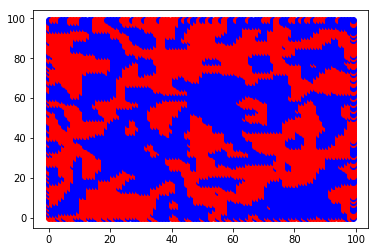

In [12]:
b = ising()
b.init()
b.loop()
b.draw()